<a href="https://colab.research.google.com/github/BimaBayuUWUUU/ML-UAS/blob/main/ML4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries and Fuctions

In [ ]:
import numpy as np
import pandas as pd
import re

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import tensorflow as tf
from keras.utils import to_categorical
import cv2

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Loading Data

In [ ]:
# Getting Data <----------
path = '94_character_TMNIST.csv'
df = pd.read_csv(path)
df.sample()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
137853,AlfaSlabOne-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Visualization

In [ ]:
all_labels = list(df['labels'].unique())

# Join all labels into a single string for regex matching
all_labels_str = ' '.join(map(str, all_labels))

# Define the regex patterns
capital_letters_regex = re.compile(r"[A-Z]")
small_letters_regex = re.compile(r"[a-z]")
numbers_regex = re.compile(r"[0-9]")
allowed_characters_regex = re.compile(r'[.:/-]')

# Find matches using the regex patterns
capital_letters = capital_letters_regex.findall(all_labels_str)
small_letters = small_letters_regex.findall(all_labels_str)
numbers = numbers_regex.findall(all_labels_str)
allowed_characters = allowed_characters_regex.findall(all_labels_str)

# Print the results
print("Capital Letters:", capital_letters)
print("Small Letters:", small_letters)
print("Numbers:", numbers)
print("Allowed Characters (., :, /, -, ,):", allowed_characters)

Capital Letters: ['D', 'F', 'J', 'H', 'A', 'G', 'W', 'N', 'P', 'X', 'I', 'Y', 'T', 'K', 'E', 'V', 'M', 'S', 'U', 'C', 'B', 'O', 'R', 'Z', 'Q', 'L']
Small Letters: ['f', 'x', 'k', 'g', 'd', 't', 'o', 'y', 'u', 'm', 'c', 'h', 'j', 'b', 'w', 'l', 'a', 'i', 'r', 'p', 'e', 's', 'q', 'n', 'z', 'v']
Numbers: ['6', '8', '1', '2', '3', '4', '9', '7', '5', '0']
Allowed Characters (., :, /, -, ,): ['/', '.', '-', ':']


Text(0.5, 1.0, 'Total Number of characters')

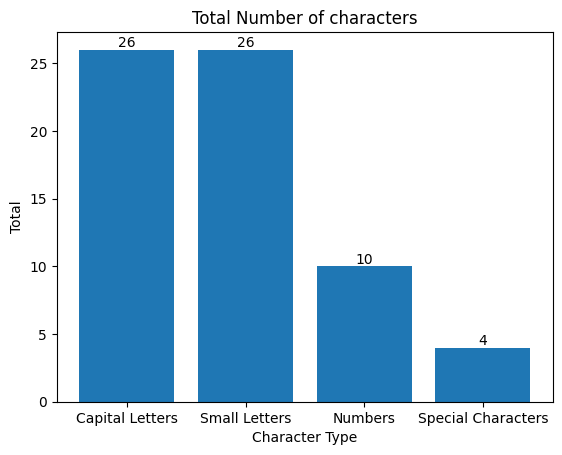

In [ ]:
fig, ax = plt.subplots()

characters = ["Capital Letters", "Small Letters", "Numbers", "Special Characters"]

counts = [len(capital_letters), len(small_letters), len(numbers), len(allowed_characters)]

bar = ax.bar(characters, counts)

ax.bar_label(bar)

ax.set_ylabel('Total')
ax.set_xlabel('Character Type')
ax.set_title('Total Number of characters')

# Spliting Labels & Images

In [ ]:
# Define a regular expression to match allowed characters
allowed_characters_regex = re.compile(r'[A-Za-z0-9.:/,-]')
# Use the regular expression to filter the DataFrame
df_selected = df[df['labels'].str.contains(allowed_characters_regex.pattern, regex=True, na=False)]

In [ ]:
# Extract features (X) and target variable (y)
X = df_selected.drop(['names','labels'], axis=1)
y = df_selected['labels']

In [ ]:
labels = y.unique()
values = [num for num in range(len(y.unique()))]
label_dict= dict(zip(labels,values)) #Creating Dictionary
label_dict_inv = dict(zip(values,labels))

# Sorting the entire dictionary and printing
sorted_items_all = sorted(label_dict.items(), key=lambda x: x[1])
print(sorted_items_all)

[('6', 0), ('D', 1), ('f', 2), ('/', 3), ('F', 4), ('x', 5), ('J', 6), ('8', 7), ('H', 8), ('k', 9), ('1', 10), ('g', 11), ('2', 12), ('d', 13), ('3', 14), ('t', 15), ('.', 16), ('4', 17), ('o', 18), ('y', 19), ('A', 20), ('u', 21), ('G', 22), ('-', 23), ('m', 24), ('W', 25), ('c', 26), ('9', 27), ('N', 28), ('P', 29), ('X', 30), ('h', 31), ('7', 32), ('j', 33), ('5', 34), ('b', 35), ('w', 36), ('l', 37), ('0', 38), ('I', 39), ('Y', 40), (':', 41), ('T', 42), ('K', 43), ('E', 44), ('V', 45), ('M', 46), ('S', 47), ('a', 48), ('i', 49), ('r', 50), ('p', 51), ('e', 52), ('U', 53), ('s', 54), (',', 55), ('C', 56), ('q', 57), ('n', 58), ('B', 59), ('z', 60), ('v', 61), ('O', 62), ('R', 63), ('Z', 64), ('Q', 65), ('L', 66)]


In [ ]:
# Transforming
y.replace(label_dict, inplace=True) #Maping Values
y.tail(5)

274086    33
274087     6
274088     0
274090    60
274092    39
Name: labels, dtype: int64

# Creating Training and Test Sets

### Reshaping and Displaying some Images

In [ ]:
# Perform train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [ ]:
Length, Height = 28,28  # <---- Defining LxH
NCl = y_train.nunique()# Unique targets -- > 94

# ------>  N of images 28x28
X_train = np.reshape(X_train.values, (X_train.shape[0] ,Length, Height))
X_test = np.reshape(X_test.values, (X_test.shape[0] ,Length, Height))

# -------> Target into Categorical Values
y_train = to_categorical(y_train, NCl, dtype='int' )
y_test = to_categorical(y_test, NCl, dtype='int' )

print(f'X:Train, Test data shape:{X_train.shape},{X_test.shape}')
print(f'Y:Train, Test data shape:{y_train.shape},{y_test.shape}')

X:Train, Test data shape:(145697, 28, 28),(48566, 28, 28)
Y:Train, Test data shape:(145697, 67),(48566, 67)


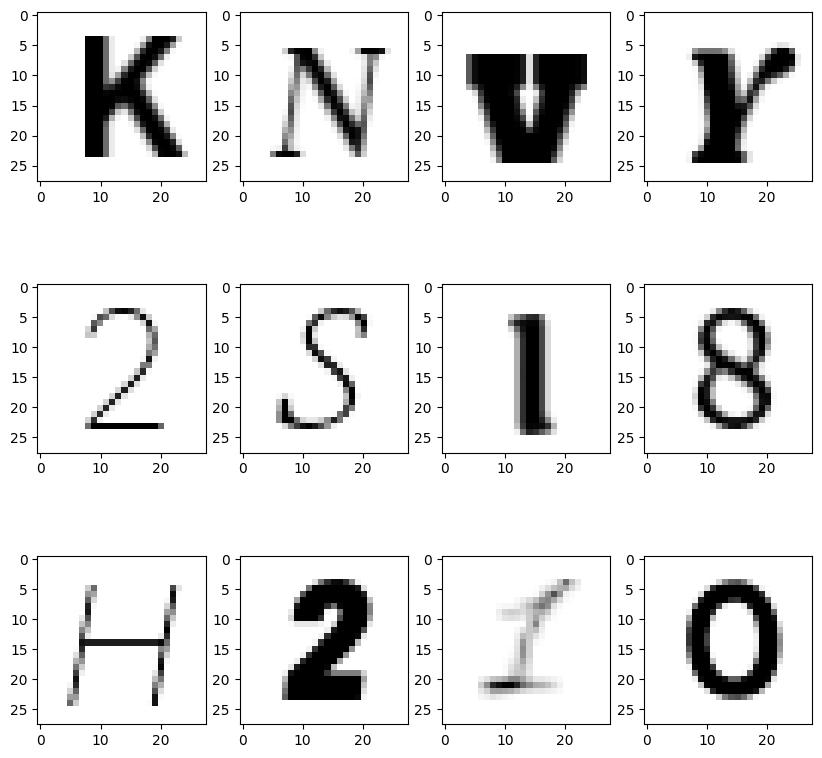

In [ ]:
random = shuffle(X_train[:500]) #Randomly shuffle (array  in a consistent way)
fig,ax = plt.subplots(3,4 , figsize = (10,10))
axes = ax.flatten()

for i in range(12):
    _,shu = cv2.threshold(random[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(random[i], (Length, Height)), cmap = 'Greys')
plt.show()

# Building Deep Learning FrameWork

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

### Reshaping for CNN

In [ ]:
RGB = 1  # In this case only one instead of 3 because we dont have Color images
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],X_train.shape[2], RGB)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],RGB)


X_train = X_train/255
X_test = X_test/255
print(f'Train, Test shapes: {X_train.shape},{X_test.shape}')

Train, Test shapes: (145697, 28, 28, 1),(48566, 28, 28, 1)


## CNN + LSTM

In [ ]:
model = keras.models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(2, 2, padding='same'),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2, padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(2, 2, padding='same'),
    layers.Reshape((-1, 128)),  # Flatten the output of the previous layer for LSTM
    layers.LSTM(64, return_sequences=True),  # LSTM layer with 64 units
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(NCl, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 128)         7

In [ ]:
from keras.utils import plot_model
from IPython.display import Image

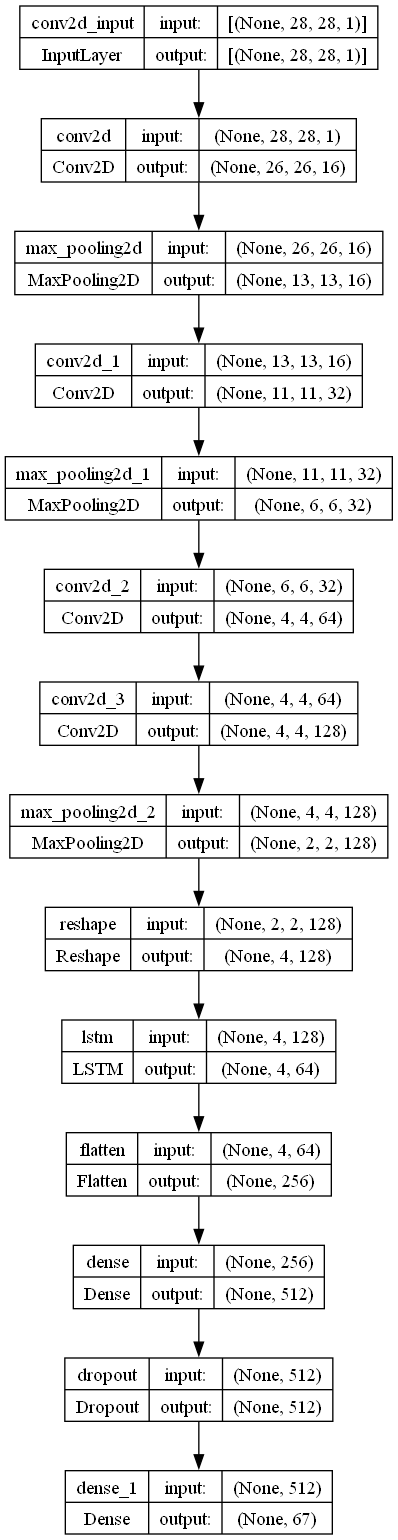

In [ ]:
# Ganti 'model' dengan model Anda
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Menampilkan gambar
Image('model_plot.png')

In [ ]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(filepath='custom_ocr_6_lstm_bs128_40ep_65_model.h5', save_best_only=True),
]

In [ ]:
#fitting the model
# Fitting model dengan callbacks
model_history = model.fit(
    X_train, y_train,
    epochs=40,
    validation_data=(X_test, y_test),
    verbose=2,
    batch_size=128,
    callbacks=callbacks
)

Epoch 1/40
1139/1139 - 23s - loss: 0.8199 - accuracy: 0.7506 - val_loss: 0.3996 - val_accuracy: 0.8607 - 23s/epoch - 20ms/step
Epoch 2/40
1139/1139 - 11s - loss: 0.3802 - accuracy: 0.8719 - val_loss: 0.3061 - val_accuracy: 0.8973 - 11s/epoch - 10ms/step
Epoch 3/40
1139/1139 - 11s - loss: 0.3072 - accuracy: 0.8974 - val_loss: 0.2867 - val_accuracy: 0.8980 - 11s/epoch - 10ms/step
Epoch 4/40
1139/1139 - 11s - loss: 0.2655 - accuracy: 0.9110 - val_loss: 0.2437 - val_accuracy: 0.9178 - 11s/epoch - 10ms/step
Epoch 5/40
1139/1139 - 11s - loss: 0.2416 - accuracy: 0.9187 - val_loss: 0.2470 - val_accuracy: 0.9134 - 11s/epoch - 10ms/step
Epoch 6/40
1139/1139 - 11s - loss: 0.2196 - accuracy: 0.9252 - val_loss: 0.2249 - val_accuracy: 0.9247 - 11s/epoch - 9ms/step
Epoch 7/40
1139/1139 - 11s - loss: 0.2089 - accuracy: 0.9286 - val_loss: 0.2082 - val_accuracy: 0.9316 - 11s/epoch - 9ms/step
Epoch 8/40
1139/1139 - 11s - loss: 0.1939 - accuracy: 0.9323 - val_loss: 0.2170 - val_accuracy: 0.9255 - 11s/epoc

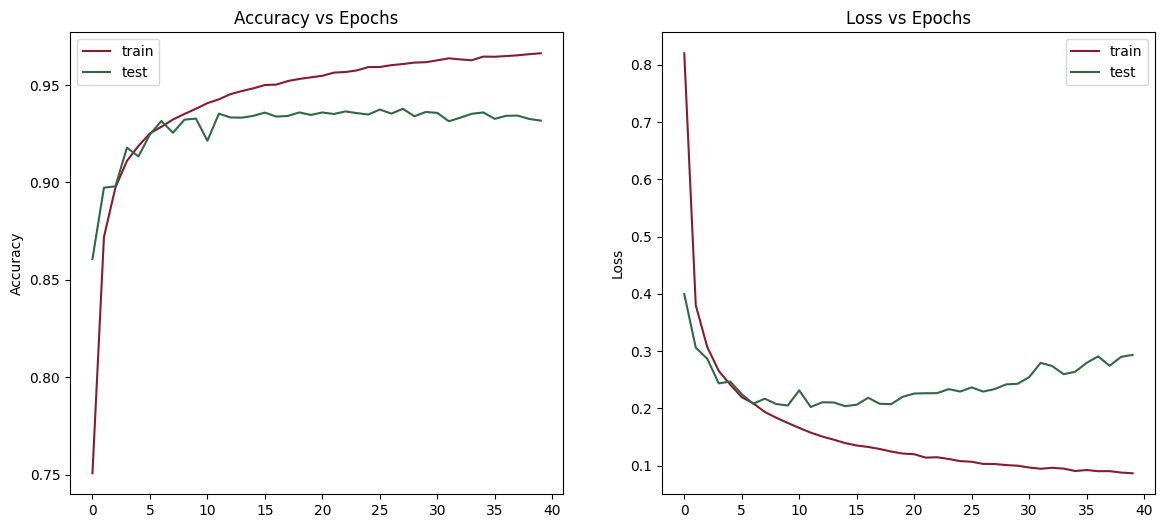

In [ ]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
epochs=np.arange(40)
plt.title('Accuracy vs Epochs')
plt.plot(epochs,model_history.history['accuracy'],label='train', color='#851D2D')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history.history['val_accuracy'],label='test', color='#306844')
plt.legend()
plt.subplot(1,2,2)
plt.title('Loss vs Epochs')
plt.plot(epochs,model_history.history['loss'],label='train', color='#851D2D')
plt.ylabel('Loss')
plt.plot(epochs,model_history.history['val_loss'],label='test', color='#306844')
plt.legend()
plt.show()

In [ ]:
# conv_model = keras.models.Sequential([
#     layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D(2, 2, padding='same'),

#     layers.Conv2D(32, (3, 3), activation='relu'),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D(2, 2, padding='same'),

#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.BatchNormalization(),

#     layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D(2, 2, padding='same'),

#     layers.Reshape((-1, 128)),  # Flatten the output of the previous layer for LSTM

#     layers.LSTM(64, return_sequences=True),  # LSTM layer with 64 units

#     layers.Flatten(),
#     layers.Dense(512, activation='relu'),
#     layers.BatchNormalization(),

#     layers.Dropout(0.5),

#     layers.Dense(NCl, activation='softmax')
# ])

In [ ]:
# conv_model = keras.models.Sequential([
#     layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D(2, 2, padding='same'),

#     layers.Conv2D(32, (3, 3), activation='relu'),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D(2, 2, padding='same'),

#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.BatchNormalization(),

#     layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D(2, 2, padding='same'),

#     layers.Flatten(),
#     layers.Dense(512, activation='relu'),
#     layers.BatchNormalization(),

#     layers.Dropout(0.5),

#     layers.Dense(NCl, activation='softmax')
# ])


In [ ]:
# conv_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# conv_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 batch_normalization_10 (Bat  (None, 26, 26, 16)       64        
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 batch_normalization_11 (Bat  (None, 11, 11, 32)       128       
 chNormalization)                                                
                                                      

In [ ]:
# callbacks2 = [
#     tf.keras.callbacks.ModelCheckpoint(filepath='custom_ocr_6_bs128_40ep_Bn_66_model.h5', save_best_only=True),
# ]

In [ ]:
# #fitting the model
# # Fitting model dengan callbacks
# model_history2 = conv_model.fit(
#     X_train, y_train,
#     epochs=40,
#     validation_data=(X_test, y_test),
#     verbose=2,
#     batch_size=128,
#     callbacks=callbacks2
# )++

Epoch 1/40
1139/1139 - 12s - loss: 0.5269 - accuracy: 0.8511 - val_loss: 0.3934 - val_accuracy: 0.8649 - 12s/epoch - 10ms/step
Epoch 2/40
1139/1139 - 10s - loss: 0.2896 - accuracy: 0.9092 - val_loss: 0.2646 - val_accuracy: 0.9114 - 10s/epoch - 9ms/step
Epoch 3/40
1139/1139 - 9s - loss: 0.2462 - accuracy: 0.9199 - val_loss: 0.2367 - val_accuracy: 0.9241 - 9s/epoch - 8ms/step
Epoch 4/40
1139/1139 - 10s - loss: 0.2225 - accuracy: 0.9269 - val_loss: 0.2313 - val_accuracy: 0.9254 - 10s/epoch - 9ms/step
Epoch 5/40
1139/1139 - 10s - loss: 0.2039 - accuracy: 0.9320 - val_loss: 0.2157 - val_accuracy: 0.9294 - 10s/epoch - 9ms/step
Epoch 6/40
1139/1139 - 10s - loss: 0.1901 - accuracy: 0.9355 - val_loss: 0.2122 - val_accuracy: 0.9297 - 10s/epoch - 9ms/step
Epoch 7/40
1139/1139 - 10s - loss: 0.1753 - accuracy: 0.9394 - val_loss: 0.2759 - val_accuracy: 0.9072 - 10s/epoch - 9ms/step
Epoch 8/40
1139/1139 - 10s - loss: 0.1667 - accuracy: 0.9420 - val_loss: 0.2141 - val_accuracy: 0.9294 - 10s/epoch - 9m

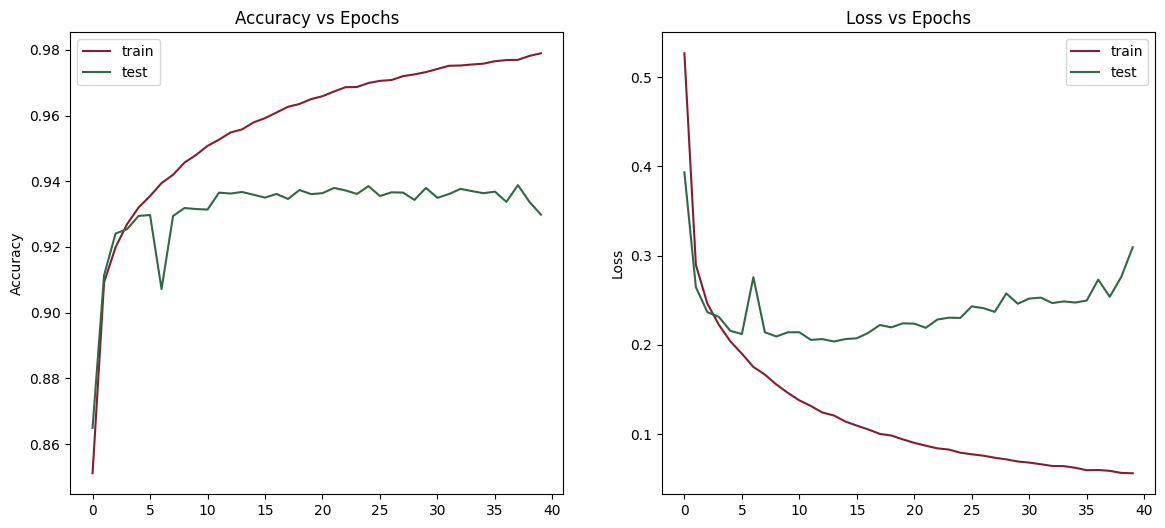

In [ ]:
# plt.figure(figsize=(14, 6))
# plt.subplot(1,2,1)
# epochs=np.arange(40)
# plt.title('Accuracy vs Epochs')
# plt.plot(epochs,model_history2.history['accuracy'],label='train', color='#851D2D')
# plt.ylabel('Accuracy')
# plt.plot(epochs,model_history2.history['val_accuracy'],label='test', color='#306844')
# plt.legend()
# plt.subplot(1,2,2)
# plt.title('Loss vs Epochs')
# plt.plot(epochs,model_history2.history['loss'],label='train', color='#851D2D')
# plt.ylabel('Loss')
# plt.plot(epochs,model_history2.history['val_loss'],label='test', color='#306844')
# plt.legend()
# plt.show()

## Making Prediction

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('custom_ocr_6_lstm_bs128_40ep_65_model.h5')

In [ ]:
# Evaluate the model on the test set
eval_result = model.evaluate(X_test, y_test, verbose=2)

# Print the evaluation results
print("\nTest Loss:", eval_result[0])
print("Test Accuracy:", eval_result[1])

1518/1518 - 6s - loss: 0.2025 - accuracy: 0.9353 - 6s/epoch - 4ms/step

Test Loss: 0.20253843069076538
Test Accuracy: 0.9352839589118958


1/1 [==============================] - 0s 22ms/step


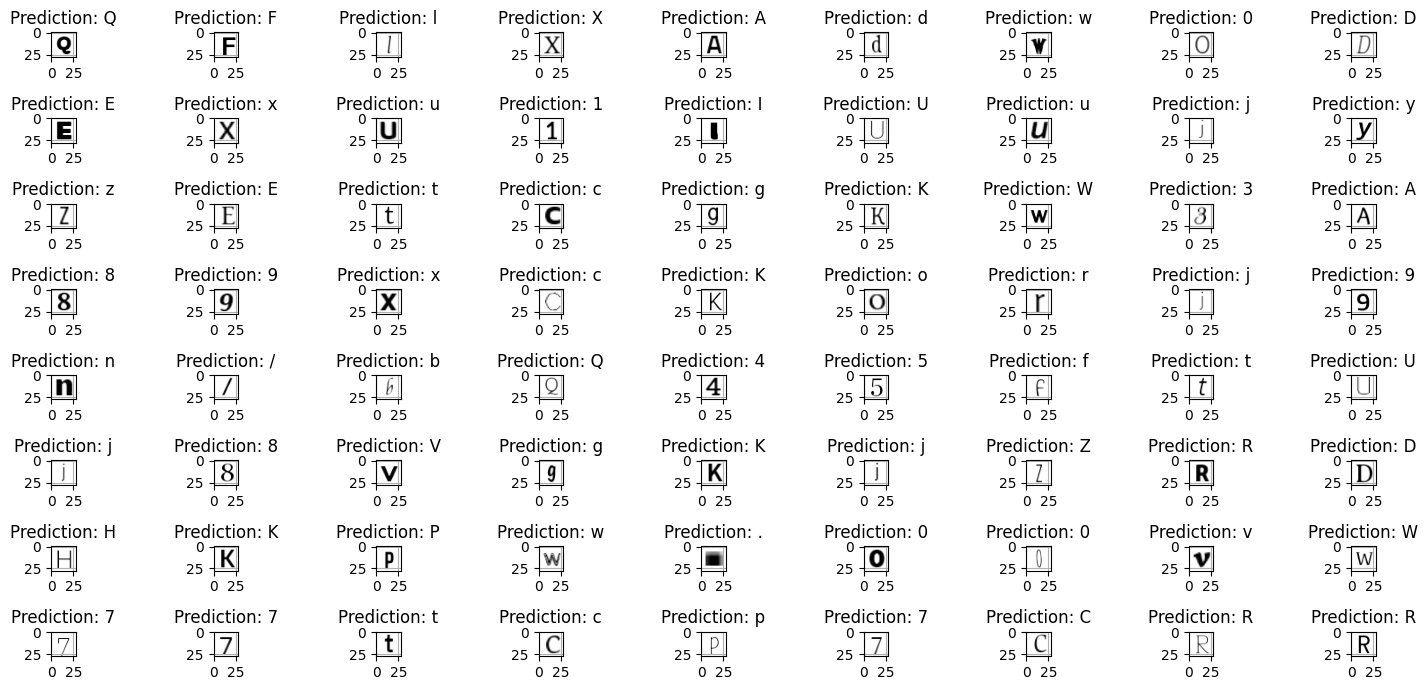

In [ ]:
import random

# Randomly select 9 indices from the test set
selected_indices = random.sample(range(len(X_test)), 72)

fig, axes = plt.subplots(8, 9, figsize=(15, 7))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(selected_indices):
        index = selected_indices[i]
        img = np.reshape(X_test[index], (28, 28))
        ax.imshow(img, cmap="Greys")
        img_final = np.reshape(X_test[index], (1, 28, 28, 1))
        pred_label_index = np.argmax(model.predict(img_final))
        pred_label_name = label_dict_inv[pred_label_index]
        ax.set_title("Prediction: " + pred_label_name)
        ax.grid()
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

plt.show()